We build the regression\
some more algorithms\
we will try to give solutions to data the challenges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Duplicates

In [5]:
df.duplicated().sum()

107

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(784, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          678 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     782 non-null    object  
 8   class        784 non-null    category
 9   who          784 non-null    object  
 10  adult_male   784 non-null    bool    
 11  deck         202 non-null    category
 12  embark_town  782 non-null    object  
 13  alive        784 non-null    object  
 14  alone        784 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 77.0+ KB


### Missing Values

In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
df.age.dropna(inplace=True)# Dropping the missing values

In [18]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
df.embarked.dropna(inplace=True)

In [22]:
df.age.mean()

29.869351032448378

In [20]:
df.age.fillna(df.age.mean(),inplace=True)

In [21]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

### Outliers

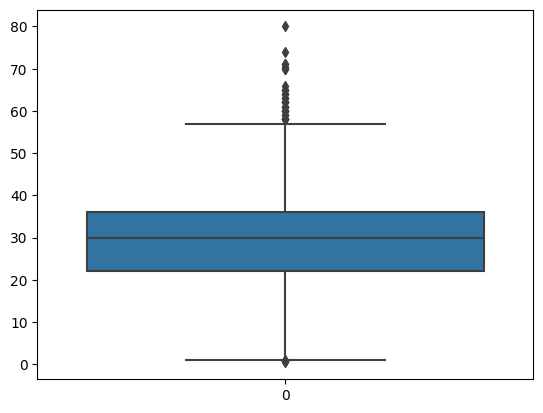

In [24]:
sns.boxplot(df.age)
plt.show()

In [35]:
quant=df['age'].quantile(q=[0.75,0.25])

In [38]:
q3=quant.loc[0.75]
q3

36.0

In [40]:
q1=quant.loc[0.25]
q1

22.0

In [42]:
IQR=q3-q1
IQR

14.0

In [43]:
maxwhisker=q3+1.5*IQR
maxwhisker

57.0

In [44]:
minwhisker=q1-1.5*IQR
minwhisker

1.0

In [47]:
df['age']=np.where(df.age>57,57,df.age)

In [48]:
df['age']=np.where(df.age<1,1,df.age)

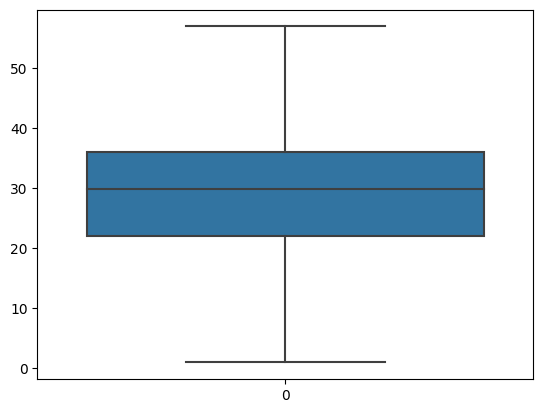

In [49]:
sns.boxplot(df.age)
plt.show()

### Scaling

Normalization--> data will be labeled into 0 and 1\
Stadardization--> It will be centred the values to mean=0 and standard deviation=1\
Robust Scaler--> when we have outliers in our data works better\
Not: it is a trail and error method to follow if normal distribution then Standardization else Normalization

In [52]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler

In [53]:
scale=StandardScaler()

In [57]:
df['fare']=scale.fit_transform(df[['fare']])

In [58]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,-0.526825,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,0.701587,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,-0.513876,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,0.352760,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,-0.511478,S,Third,man,True,NaN,Southampton,no,True


## Categorical(Encoding)
Labelencoding and OneHotEncoding

In [59]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [60]:
encoder=LabelEncoder()

In [62]:
df.sex=encoder.fit_transform(df.sex)

In [63]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,-0.526825,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.000000,1,0,0.701587,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.000000,0,0,-0.513876,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.000000,1,0,0.352760,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.000000,0,0,-0.511478,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.000000,0,5,-0.107176,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,0,19.000000,0,0,-0.090390,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,29.869351,1,2,-0.216045,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.000000,0,0,-0.090390,C,First,man,True,C,Cherbourg,yes,True


## Imbalanced

In [65]:
df.alive.value_counts()#imbalanced data

alive
no     461
yes    323
Name: count, dtype: int64

Oversampling\
undersampling\
Smote\
bordersmote\
adasyn

In [ ]:
!pip install imblearn

In [71]:
from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE

In [72]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,-0.526825,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,0.701587,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,-0.513876,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,0.352760,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,-0.511478,S,Third,man,True,NaN,Southampton,no,True


In [74]:
Y=df[['alive']]

In [77]:
X=df[['survived','pclass','sex']]

In [78]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=4)

In [88]:
x_train

,survived,pclass,sex
350,0,3,1
610,0,3,0
287,0,3,1
731,0,3,1
724,1,1,1
...,...,...,...
392,0,3,1
803,1,3,1
487,0,1,1
183,1,2,1


In [81]:
x_test

,survived,pclass,sex
767,0,3,0
516,1,2,0
853,1,1,0
205,0,3,0
292,0,2,1
...,...,...,...
572,1,1,1
603,0,3,1
27,0,1,1
741,0,1,1


In [89]:
encoder=SMOTE(sampling_strategy=1)

In [90]:
x_train,y_train=encoder.fit_resample(x_train,y_train)

In [91]:
pd.DataFrame(y_train).value_counts()

alive
no       356
yes      356
Name: count, dtype: int64